###attempting to make a CNN classifier to identify what disease a leaf has <br>
importing everything I need, and then <br>
loading and preprocessing the data

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
data_dir = 'leaf_data'

# Set image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Define the class order you want
class_order = ['Normal', 'Bacteria', 'Fungi', 'Nematodes', 'Virus']

# Create ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_order,
    subset='training'
)

# Load validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_order,
    subset='validation'
)

# Print class indices to see how the generator has mapped folder names to class labels
print(train_data.class_indices)

Found 192 images belonging to 5 classes.


Found 47 images belonging to 5 classes.
{'Normal': 0, 'Bacteria': 1, 'Fungi': 2, 'Nematodes': 3, 'Virus': 4}


create the convolutional neural network

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

model.summary()

c:\Users\elifu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,293 (42.47 MB)

 Trainable params: 11,132,293 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

compile and train the model

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/50


c:\Users\elifu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 940ms/step - accuracy: 0.1914 - loss: 2.5934 - val_accuracy: 0.2128 - val_loss: 1.6184
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 757ms/step - accuracy: 0.2360 - loss: 1.5989 - val_accuracy: 0.4043 - val_loss: 1.4380
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 737ms/step - accuracy: 0.3208 - loss: 1.5265 - val_accuracy: 0.3191 - val_loss: 1.4110
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 748ms/step - accuracy: 0.2833 - loss: 1.5023 - val_accuracy: 0.4468 - val_loss: 1.4014
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 733ms/step - accuracy: 0.3827 - loss: 1.4636 - val_accuracy: 0.5745 - val_loss: 1.3864
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step - accuracy: 0.5074 - loss: 1.3901 - val_accuracy: 0.5319 - val_loss: 1.1357
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.5203 - loss: 1.1667 - val_accuracy: 0.5532 - val_loss: 1.1779
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 731ms/step - accuracy: 0.5136 - loss: 1.2365 - val_accuracy: 0.6170 - val_loss: 0.9800
Epo

evaluate the model

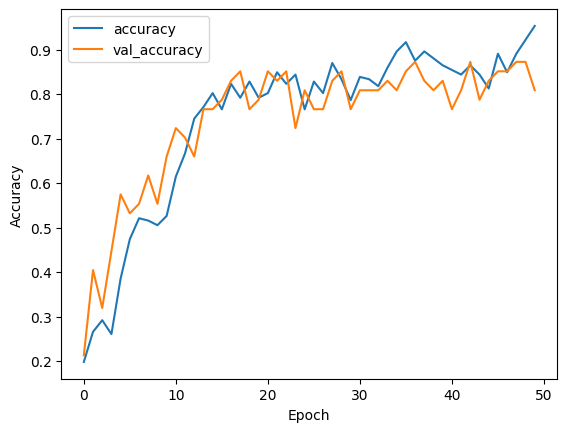

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8770 - loss: 0.4657
Validation accuracy: 0.8936


In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation accuracy: {val_acc:.4f}")

use the model for predictions

In [10]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    return predicted_class, confidence

# Example usage
normal = 'leaf_data/Normal/0ce4ee15-d59b-4212-ab2a-8b6a07f3634f___JR_HL 9707.JPG'
nematode = 'leaf_data/Nematodes/1a6aabd0-7ca8-4074-a457-5a8f3662a7d7___FAM_B.Rot 3539.JPG'
predicted_class_normal, confidence_normal = predict_image(normal)
print(f"Predicted class: {predicted_class_normal}")
print(f"Confidence: {confidence_normal:.4f}")
predicted_class_nematode, confidence_nematode = predict_image(nematode)
print(f"Predicted class: {predicted_class_nematode}")
print(f"Confidence: {confidence_nematode:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: Normal
Confidence: 0.9935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Nematodes
Confidence: 0.9661


It got both of these right with high confidence which is great! Also, accuracy of over 80% pretty consistently is great, not perfect, but great for a quickly trained CNN.

For a next step I may try to use pytorch or huggingface isntead of tensorflow.